In [1]:
# A demo for learning rate adjustment

In [2]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
init_lr = tf.Variable(0., name="LR")
global_step = tf.Variable(0., name="global_step")
decay_step = tf.Variable(0., name="decay_step")
decay_rate = tf.Variable(0., name="decay_rate")

In [5]:
# Smooth learning rate
learning_rate_sm = tf.train.exponential_decay(
    learning_rate = init_lr ,
    global_step = global_step,
    decay_steps = decay_step,
    decay_rate = decay_rate,
    staircase=False,
    name=None
    )
# Staircase learning rate
learning_rate_st = tf.train.exponential_decay(
    learning_rate = init_lr ,
    global_step = global_step,
    decay_steps = decay_step,
    decay_rate = decay_rate,
    staircase=True,
    name=None
    )

In [6]:
# Test
lr_init = 0.1
epochs = 5000
batches = 100.
d_rate = 0.95
epoch = np.arange(0,epochs,1)
lr_sm = np.zeros(epoch.shape)
lr_st = np.zeros(epoch.shape)
# Init a session
init_op = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init_op)
for i in epoch.astype(int):
    lr_sm[i] = sess.run(learning_rate_sm, 
                        feed_dict={init_lr: lr_init,
                                   global_step: i,
                                   decay_step: batches,
                                   decay_rate: d_rate
                                  })
    lr_st[i] = sess.run(learning_rate_st, 
                        feed_dict={init_lr: lr_init,
                                   global_step: i,
                                   decay_step: batches,
                                   decay_rate: d_rate
                                  })

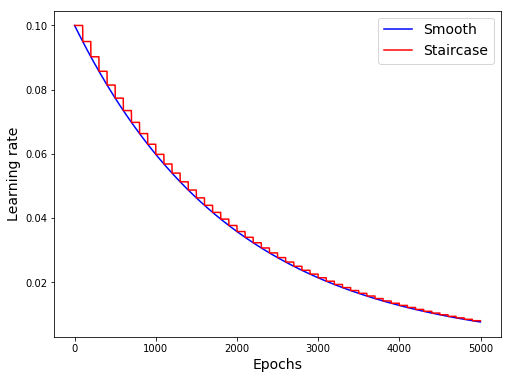

In [7]:
plt.rcParams["figure.figsize"] = [8.0, 6.0]

plt.plot(epoch,lr_sm,color='blue')
plt.plot(epoch,lr_st,color='red')
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Learning rate",fontsize=14)
plt.legend(["Smooth", "Staircase"],fontsize=14)
plt.savefig("fig2.png",bbox_inches='tight',dpi=200)